# Logistic Regression - Credit Approval Classification

This notebook implements a Logistic Regression model for binary classification of credit approval.

**Dataset:** UCI Credit Approval (ID: 27)
- Total Samples: 690 applicants
- Features: 15 (mix of categorical and numerical attributes)
- Target: Credit approval decision (2 classes: Approved/Denied)
- Training Set: 552 samples (80%)
- Testing Set: 138 samples (20%)

**Evaluation Metrics:**
1. Accuracy
2. AUC Score
3. Precision
4. Recall
5. F1 Score
6. Matthews Correlation Coefficient (MCC)

## 1. Import Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, matthews_corrcoef,
    confusion_matrix, classification_report, roc_curve, auc
)
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Load Dataset from Kaggle

In [108]:
# Load the Credit Approval Dataset
from ucimlrepo import fetch_ucirepo

print("Loading dataset from UCI ML Repository...")
# Fetch dataset
credit_approval = fetch_ucirepo(id=27)

# Get data as pandas dataframes
X = credit_approval.data.features
y = credit_approval.data.targets

# Combine features and target
df = pd.concat([X, y], axis=1)
print(f"Dataset loaded successfully! Shape: {df.shape}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(f"Shape: {df.shape}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

Loading dataset from UCI ML Repository...
Dataset loaded successfully! Shape: (690, 16)

First 5 rows:
   A15    A14 A13 A12  A11 A10 A9    A8 A7 A6 A5 A4     A3     A2 A1 A16
0    0  202.0   g   f    1   t  t  1.25  v  w  g  u  0.000  30.83  b   +
1  560   43.0   g   f    6   t  t  3.04  h  q  g  u  4.460  58.67  a   +
2  824  280.0   g   f    0   f  t  1.50  h  q  g  u  0.500  24.50  a   +
3    3  100.0   g   t    5   t  t  3.75  v  w  g  u  1.540  27.83  b   +
4    0  120.0   s   f    0   f  t  1.71  v  w  g  u  5.625  20.17  b   +

Dataset Info:
Shape: (690, 16)

Data Types:
A15      int64
A14    float64
A13     object
A12     object
A11      int64
A10     object
A9      object
A8     float64
A7      object
A6      object
A5      object
A4      object
A3     float64
A2     float64
A1      object
A16     object
dtype: object

Missing Values:
A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1 

## 3. Data Preprocessing

In [109]:
# Create a copy
df_processed = df.copy()

# Handle missing values
print("Handling missing values...")
df_processed = df_processed.dropna()
print(f"Shape after dropping NaN: {df_processed.shape}")

# Identify categorical and numerical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Encode categorical variables
label_encoders = {}
target_col_name = df_processed.columns[-1]  # Get actual target column name

for col in categorical_cols:
    if col != target_col_name:  # Keep target separate
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"Encoded {col}")

# Handle target variable encoding
if df_processed[target_col_name].dtype == 'object':
    target_le = LabelEncoder()
    df_processed[target_col_name] = target_le.fit_transform(df_processed[target_col_name])
    label_encoders[target_col_name] = target_le

print("\nData preprocessing completed!")

Handling missing values...
Shape after dropping NaN: (653, 16)

Categorical columns: ['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1', 'A16']
Numerical columns: ['A15', 'A14', 'A11', 'A8', 'A3', 'A2']
Encoded A13
Encoded A12
Encoded A10
Encoded A9
Encoded A7
Encoded A6
Encoded A5
Encoded A4
Encoded A1

Data preprocessing completed!


## 4. Prepare Features and Target

In [110]:
# Identify target column (last column)
target_col = df_processed.columns[-1]

# Separate features and target
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nFeature names:")
print(X.columns.tolist())

Features shape: (653, 15)
Target shape: (653,)

Target distribution:
A16
1    357
0    296
Name: count, dtype: int64

Feature names:
['A15', 'A14', 'A13', 'A12', 'A11', 'A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1']


## 5. Split Data and Scale Features

In [111]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nTraining target distribution:")
print(y_train.value_counts())

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler!")

Training set size: 522
Testing set size: 131

Training target distribution:
A16
1    281
0    241
Name: count, dtype: int64

Features scaled using StandardScaler!


## 6. Train Logistic Regression Model

In [112]:
# Create and train the Logistic Regression model
print("Training Logistic Regression Model...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

print("✅ Model training completed!")
print(f"\nModel parameters:")
print(f"Number of features: {lr_model.n_features_in_}")
print(f"Classes: {lr_model.classes_}")

Training Logistic Regression Model...
✅ Model training completed!

Model parameters:
Number of features: 15
Classes: [0 1]


## 7. Make Predictions

In [113]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)

print("Predictions made on test set!")
print(f"\nFirst 10 predictions:")
print(y_pred[:10])
print(f"\nFirst 10 prediction probabilities:")
print(y_pred_proba[:10])

Predictions made on test set!

First 10 predictions:
[0 1 0 1 1 1 1 0 0 1]

First 10 prediction probabilities:
[[0.64663494 0.35336506]
 [0.33230794 0.66769206]
 [0.99833079 0.00166921]
 [0.04150525 0.95849475]
 [0.02690778 0.97309222]
 [0.03705884 0.96294116]
 [0.13728218 0.86271782]
 [0.99603741 0.00396259]
 [0.7847936  0.2152064 ]
 [0.0167061  0.9832939 ]]


## 8. Calculate Evaluation Metrics

In [114]:
# Calculate all 6 evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)

# Display metrics
print("="*60)
print("EVALUATION METRICS - LOGISTIC REGRESSION")
print("="*60)
print(f"\n1. Accuracy:          {accuracy:.4f}")
print(f"2. AUC Score:         {auc_score:.4f}")
print(f"3. Precision:         {precision:.4f}")
print(f"4. Recall:            {recall:.4f}")
print(f"5. F1 Score:          {f1:.4f}")
print(f"6. MCC Score:         {mcc:.4f}")
print("="*60)

# Store metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'AUC Score': auc_score,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'MCC Score': mcc
}

# Display as DataFrame
metrics_df = pd.DataFrame(metrics, index=['Logistic Regression']).T
print("\nMetrics Summary:")
print(metrics_df)

EVALUATION METRICS - LOGISTIC REGRESSION

1. Accuracy:          0.8397
2. AUC Score:         0.9029
3. Precision:         0.8463
4. Recall:            0.8397
5. F1 Score:          0.8406
6. MCC Score:         0.6806

Metrics Summary:
           Logistic Regression
Accuracy              0.839695
AUC Score             0.902871
Precision             0.846340
Recall                0.839695
F1 Score              0.840621
MCC Score             0.680585


## 9. Additional Evaluation

In [115]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[48  7]
 [14 62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        55
           1       0.90      0.82      0.86        76

    accuracy                           0.84       131
   macro avg       0.84      0.84      0.84       131
weighted avg       0.85      0.84      0.84       131



## 10. Visualizations

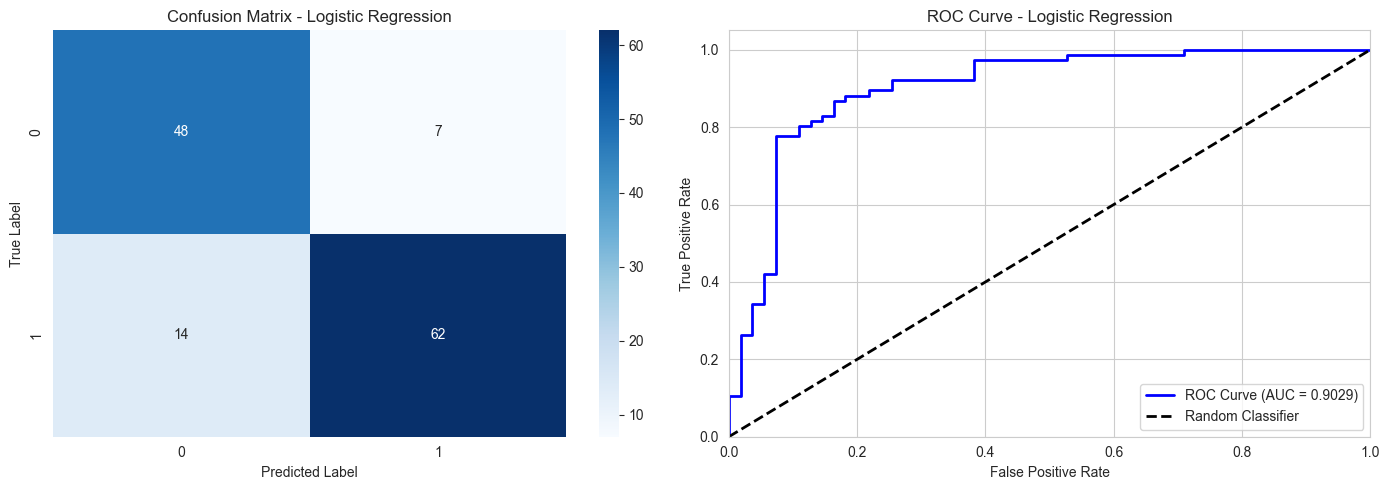


Visualizations complete!


In [116]:
# Plot Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# ROC Curve for binary classification
from sklearn.metrics import roc_curve, auc

# Compute ROC for binary classification
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - Logistic Regression')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

print("\nVisualizations complete!")

## 11. Model Summary

In [117]:
print("\n" + "="*60)
print("LOGISTIC REGRESSION MODEL SUMMARY")
print("="*60)
print(f"\nModel Type: Logistic Regression")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")
print(f"Number of Features: {X_train.shape[1]}")
print(f"\nKey Metrics:")
print(f"  - Accuracy:  {accuracy:.4f}")
print(f"  - AUC Score: {auc_score:.4f}")
print(f"  - F1 Score:  {f1:.4f}")
print(f"\nModel Status: ✅ Training Complete")
print("="*60)


LOGISTIC REGRESSION MODEL SUMMARY

Model Type: Logistic Regression
Training Samples: 522
Testing Samples: 131
Number of Features: 15

Key Metrics:
  - Accuracy:  0.8397
  - AUC Score: 0.9029
  - F1 Score:  0.8406

Model Status: ✅ Training Complete
